In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

sns.set(palette='pastel')
sns.set_style('white')
sns.palplot(sns.color_palette())

# Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedShuffleSplit

df = pd.read_csv('output.csv', sep=',', dtype={'y': object})

%matplotlib inline

In [89]:
df.head(10)

,Unnamed: 0,FCD,FCO,FVD,FVO,G1,G2,G3,GF,RC,RV,S1,S2,S3,T1,T2,T3,cartoes_amarelo,cartoes_vermelho,y
0,0,0.55,0.41,0.55,0.51,0,0.0,0.0,0.0,0,1,SA,SA,SA,60,61,80,1,0,111
1,1,0.72,0.44,0.72,0.43,1,1.0,1.0,1.0,1,0,OFF,DEF,OFF,43,76,84,1,0,010
2,2,0.70,0.43,0.70,0.38,0,0.0,0.0,3.0,1,0,SA,OFF,DEF,55,64,88,2,1,001
3,3,0.57,0.51,0.57,0.41,0,0.0,0.0,1.0,1,0,SA,DEF,DEF,47,49,74,1,0,001
4,4,0.79,0.45,0.79,0.34,1,1.0,1.0,3.0,1,0,DEF,OFF,DEF,43,67,76,1,0,111
5,5,0.71,0.68,0.71,0.64,1,1.0,1.0,0.0,1,0,OFF,SA,SA,58,69,78,2,0,111
6,6,0.59,0.18,0.59,0.53,0,1.0,1.0,-1.0,0,1,SA,SA,SA,5,64,84,1,0,111
7,7,0.59,0.39,0.59,0.55,1,1.0,1.0,0.0,0,1,OFF,DEF,SA,65,66,77,1,0,111
8,8,0.82,0.40,0.82,0.18,0,0.0,0.0,1.0,1,0,DEF,OFF,SA,26,62,88,1,1,001
9,9,0.78,0.55,0.78,0.39,0,0.0,0.0,2.0,1,0,SA,SA,DEF,61,77,86,1,0,111


In [90]:
df['DOD'] = df['FVO'] - df['FCD']
df['DDO'] = df['FVD'] - df['FCO']

In [91]:
def criarIntervalos(x):
  if (x == -1):
    return x
  if (x == None):
    print('erro')
  if (x == 'INTERVALO'):
    x = 45
  x = int(x)
  if (x <= 15):
    return 0
  elif (x <= 30):
    return 1
  elif (x <= 45):
    return 2
  elif (x <= 60):
    return 3
  elif (x <= 75):
    return 4
  else:
    return 5

# def criarIntervalos(x):
#   if (x == -1):
#     return x
#   if (x == None):
#     print('erro')
#   if (x == 'INTERVALO'):
#     x = 45
#   x = int(x)
#   if (x <= 25):
#     return 0
#   elif (x <= 50):
#     return 1
#   elif (x <= 75):
#     return 2
#   else:
#     return 3

df['T1'] = df['T1'].apply(criarIntervalos)
df['T2'] = df['T2'].apply(criarIntervalos)
df['T3'] = df['T3'].apply(criarIntervalos)

In [92]:
df[df['T2'] == 4]

,Unnamed: 0,FCD,FCO,FVD,FVO,G1,G2,G3,GF,RC,...,S2,S3,T1,T2,T3,cartoes_amarelo,cartoes_vermelho,y,DOD,DDO
0,0,0.55,0.41,0.55,0.51,0,0.0,0.0,0.0,0,...,SA,SA,3,4,5,1,0,111,-0.04,0.14
2,2,0.70,0.43,0.70,0.38,0,0.0,0.0,3.0,1,...,OFF,DEF,3,4,5,2,1,001,-0.32,0.27
4,4,0.79,0.45,0.79,0.34,1,1.0,1.0,3.0,1,...,OFF,DEF,2,4,5,1,0,111,-0.45,0.34
5,5,0.71,0.68,0.71,0.64,1,1.0,1.0,0.0,1,...,SA,SA,3,4,5,2,0,111,-0.07,0.03
6,6,0.59,0.18,0.59,0.53,0,1.0,1.0,-1.0,0,...,SA,SA,0,4,5,1,0,111,-0.06,0.41
7,7,0.59,0.39,0.59,0.55,1,1.0,1.0,0.0,0,...,DEF,SA,4,4,5,1,0,111,-0.04,0.20
8,8,0.82,0.40,0.82,0.18,0,0.0,0.0,1.0,1,...,OFF,SA,1,4,5,1,1,001,-0.64,0.42
10,10,0.90,0.34,0.90,0.44,1,1.0,1.0,1.0,0,...,OFF,SA,4,4,5,1,0,001,-0.46,0.56
14,14,0.78,0.51,0.78,0.39,0,2.0,2.0,0.0,1,...,SA,SA,2,4,5,5,1,100,-0.39,0.27
16,16,0.62,0.64,0.62,0.38,1,1.0,1.0,1.0,1,...,SA,OFF,4,4,5,2,0,010,-0.24,-0.02


In [93]:
X = df[['G2', 'S1', 'T1', 'G1', 'S2', 'T2', 'FVD', 'FVO', 'FCD', 'FCO', 'RC', 'RV', 'DOD', 'DDO']]
COLS = X.columns
y = df['y'].astype(str).apply(lambda y: y[1])

In [94]:
X.head(3)

,G2,S1,T1,G1,S2,T2,FVD,FVO,FCD,FCO,RC,RV,DOD,DDO
0,0.0,SA,3,0,SA,4,0.55,0.51,0.55,0.41,0,1,-0.04,0.14
1,1.0,OFF,2,1,DEF,5,0.72,0.43,0.72,0.44,1,0,-0.29,0.28
2,0.0,SA,3,0,OFF,4,0.70,0.38,0.70,0.43,1,0,-0.32,0.27


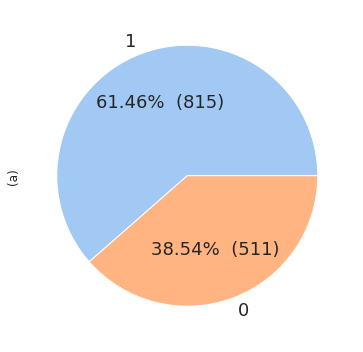

In [95]:
y.value_counts().plot(kind='pie', figsize=(12,6), fontsize=18, title='', autopct=(lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(y.value_counts())/100))).title.set_size(14)
plt.ylabel('(a)')
plt.savefig("y2.svg", format="svg")

In [96]:
X['S1'] = LabelEncoder().fit_transform(X['S1'])
X['S2'] = LabelEncoder().fit_transform(X['S2'])
df['S1'] = LabelEncoder().fit_transform(df['S1'])
df['S2'] = LabelEncoder().fit_transform(df['S2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
X.head(3)

,G2,S1,T1,G1,S2,T2,FVD,FVO,FCD,FCO,RC,RV,DOD,DDO
0,0.0,2,3,0,2,4,0.55,0.51,0.55,0.41,0,1,-0.04,0.14
1,1.0,1,2,1,0,5,0.72,0.43,0.72,0.44,1,0,-0.29,0.28
2,0.0,2,3,0,1,4,0.70,0.38,0.70,0.43,1,0,-0.32,0.27


# Heatmap

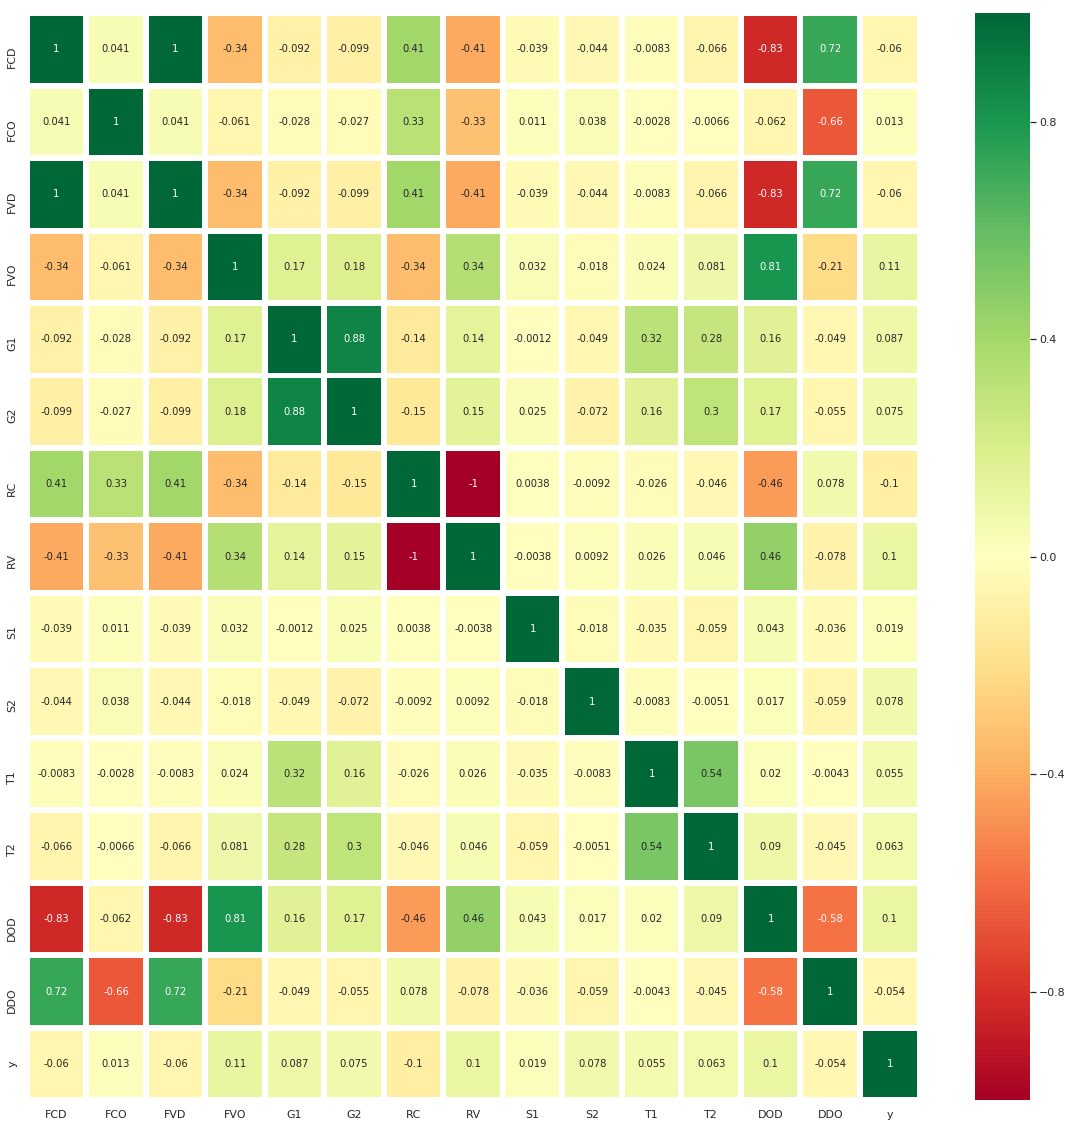

In [98]:
y_ = pd.DataFrame.from_records(y, columns=['y']).astype(str).astype(int)

df_copy = df.copy()
df_copy.drop(['cartoes_amarelo', 'cartoes_vermelho', 'Unnamed: 0', 'y', 'GF', 'S3', 'G3', 'T3'], axis=1, inplace=True)
D = pd.concat([df_copy, y_], axis=1)
corrmat = D.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
#plot mapa de calor
g=sns.heatmap(D[top_corr_features].corr(), linewidth=5, annot=True, cmap="RdYlGn")
plt.savefig("corr_2sub.svg", format="svg")

# Aprendizado de máquina

## Model selection

In [99]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

COLS = X.columns
selector = SelectKBest(score_func=f_classif,k=6)
X = selector.fit_transform(X, y)
X = pd.DataFrame.from_records(X)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(COLS)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(6, 'Score'))

cols = selector.get_support(indices=True)

   Specs      Score
7    FVO  16.738845
11    RV  14.624590
10    RC  14.624590
12   DOD  14.518014
3     G1  10.064383
4     S2   8.123572


In [100]:
X

,0,1,2,3,4,5
0,0.0,2.0,0.51,0.0,1.0,-0.04
1,1.0,0.0,0.43,1.0,0.0,-0.29
2,0.0,1.0,0.38,1.0,0.0,-0.32
3,0.0,0.0,0.41,1.0,0.0,-0.16
4,1.0,1.0,0.34,1.0,0.0,-0.45
5,1.0,2.0,0.64,1.0,0.0,-0.07
6,0.0,2.0,0.53,0.0,1.0,-0.06
7,1.0,0.0,0.55,0.0,1.0,-0.04
8,0.0,1.0,0.18,1.0,0.0,-0.64
9,0.0,2.0,0.39,1.0,0.0,-0.39


In [101]:
colunas = X.columns

Xt = MinMaxScaler().fit_transform(X)
Xt = pd.DataFrame.from_records(X)
Xt.columns = colunas

# Separação em conjunto de treino e de teste
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=42)

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

ssst = StratifiedShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=42)

for train_index, test_index in sss.split(Xt, y):
  Xt_train, Xt_test = Xt.iloc[train_index], Xt.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

In [102]:
COLUNAS = COLS[cols]
print (COLUNAS)

Index(['G1', 'S2', 'FVO', 'RC', 'RV', 'DOD'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.68844221 0.71105528 0.72361809 0.6959799  0.68341709 0.71105528
 0.73366834 0.7160804  0.68592965 0.72864322]
RFC: 0.707789 (0.017409)
[0.66331658 0.70854271 0.6758794  0.65075377 0.66582915 0.67336683
 0.70351759 0.70603015 0.68592965 0.69095477]
DTR: 0.682412 (0.018809)
[0.80653266 0.78140704 0.78140704 0.76884422 0.74874372 0.78894472
 0.80150754 0.77386935 0.79648241 0.7839196 ]
SVM: 0.783166 (0.016051)
[0.74874372 0.76130653 0.75125628 0.70100503 0.73115578 0.74623116
 0.7361809  0.75628141 0.72864322 0.76130653]
KNN: 0.742211 (0.017631)


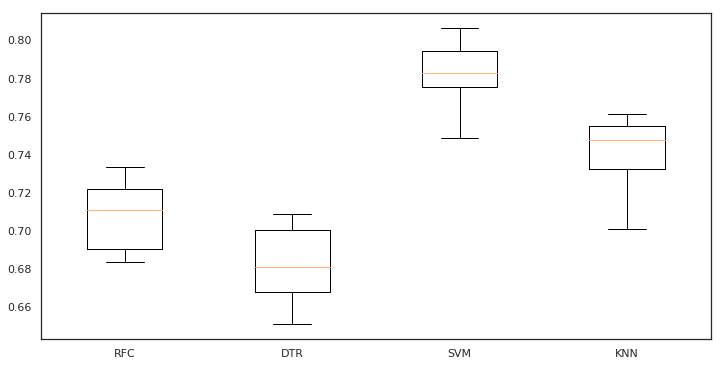

In [103]:
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Preparação dos modelos
modelos = [
    ('RFC', RandomForestClassifier(random_state=42)),
    ('DTR', DecisionTreeClassifier()),
    ('SVM', SVC(gamma = 'auto')),
    ('KNN', KNeighborsClassifier()),
]

# Testando o desempenho de cada classificador
resultados = []
nomes = []
scoring = 'accuracy'

for nome, modelo in modelos:
  if (nome == 'KNN'):
    resultados_cv = cross_val_score(modelo, Xt, y.values.ravel(), cv=sss, scoring=scoring)
  else:
    resultados_cv = cross_val_score(modelo, X, y.values.ravel(), cv=sss, scoring=scoring)
  
  resultados.append(resultados_cv)
  print(resultados_cv)
  nomes.append(nome)
  mensagem = "%s: %f (%f)" % (nome, resultados_cv.mean(), resultados_cv.std())
  print (mensagem)
  
# Comparação dos algoritmos
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)

plt.savefig("comparacao_classificadores_1.svg", format="svg")

## Implementação dos classificadores

*   Random Forest
*   SVM
*   KNN


Index(['G2', 'S1', 'T1', 'G1', 'S2', 'T2', 'FVD', 'FVO', 'FCD', 'FCO', 'RC',
       'RV', 'DOD', 'DDO'],
      dtype='object')
SVC performance: 

              precision    recall  f1-score   support

           0       0.76      0.64      0.70       153
           1       0.80      0.87      0.83       245

    accuracy                           0.78       398
   macro avg       0.78      0.76      0.76       398
weighted avg       0.78      0.78      0.78       398

Accuracy score: 0.783920
Best params: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}

KNN performance: 

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       153
           1       0.79      0.88      0.83       245

    accuracy                           0.78       398
   macro avg       0.78      0.75      0.76       398
weighted avg       0.78      0.78      0.78       398

Accuracy score: 0.781407
Best params: {'metric

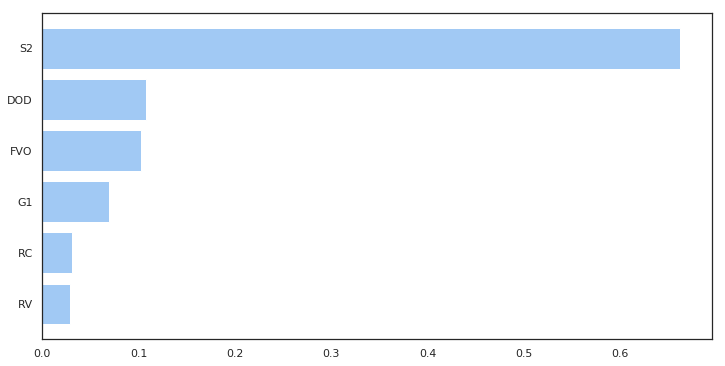

In [104]:
# Escolhi os três primeiros classificadores mais bem colocados: RFC, SVM e KNN

from sklearn.model_selection import GridSearchCV

params_rfc = {
   'n_estimators': [200, 500, 1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['gini', 'entropy'],
}

params_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 0.25, 0.5, 0.75],
    'gamma': [1, 2, 3, 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'shrinking': [True, False]
}

params_knn = {
    'n_neighbors': [3,5,11,19],
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

melhores_modelos = [
    ('SVC', SVC(gamma = 'auto'), params_svm),
    ('KNN', KNeighborsClassifier(), params_knn),
    ('RFC', RandomForestClassifier(), params_rfc)
]

print(COLS)

for nome, modelo, params in melhores_modelos:
    print(nome, "performance: \n")
    grid_search = GridSearchCV(modelo, param_grid=params, scoring="accuracy", cv=sss)
    
    if (nome == 'KNN'):
        m = grid_search.fit(Xt_train, y_train.values.ravel())
        pred = m.predict(Xt_test)
    else:
        m = grid_search.fit(X_train, y_train.values.ravel())
        pred = m.predict(X_test)
        
    print(classification_report(y_test.values.ravel(), pred))
    print("Accuracy score: {:.6f}".format(accuracy_score(y_test, pred)))
    print("Best params: {}\n".format(grid_search.best_params_))
    
    if nome != 'KNN' and nome != 'SVC':
        print("Best features: {}\n".format(m.best_estimator_.feature_importances_))
        importances = m.best_estimator_.feature_importances_
        indices = np.argsort(importances)
        
        plt.figure(figsize=(12,6))
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [COLUNAS[i] for i in indices])
        plt.savefig("feature_importances_2sub_com_otimizacao.svg", format="svg")

In [105]:
X

,0,1,2,3,4,5
0,0.0,2.0,0.51,0.0,1.0,-0.04
1,1.0,0.0,0.43,1.0,0.0,-0.29
2,0.0,1.0,0.38,1.0,0.0,-0.32
3,0.0,0.0,0.41,1.0,0.0,-0.16
4,1.0,1.0,0.34,1.0,0.0,-0.45
5,1.0,2.0,0.64,1.0,0.0,-0.07
6,0.0,2.0,0.53,0.0,1.0,-0.06
7,1.0,0.0,0.55,0.0,1.0,-0.04
8,0.0,1.0,0.18,1.0,0.0,-0.64
9,0.0,2.0,0.39,1.0,0.0,-0.39


# PCA

In [21]:
x = StandardScaler().fit_transform(X)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [25]:
finalDf = pd.concat([principalDf, y], axis = 1)

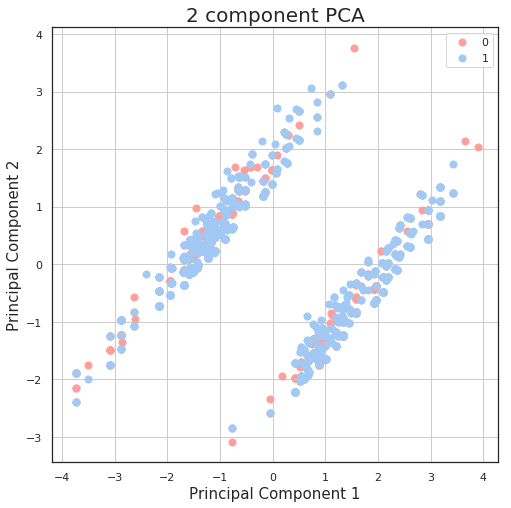

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [34]:
pca.explained_variance_ratio_

array([0.45909015, 0.18793925])